<a href="https://colab.research.google.com/github/bckang-ben/exercise/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

import matplotlib.pyplot as plt

In [25]:
num_data = 1000
n_epoch = 10000

noise = init.normal_(torch.FloatTensor(num_data,1), std=0.2)
x = init.uniform_(torch.FloatTensor(num_data,1),-15,15)

y = (x**2)+3
y_noise = y+noise

In [26]:
model = nn.Sequential(
    nn.Linear(1,6),
    nn.ReLU(),
    nn.Linear(6,10),
    nn.ReLU(),
    nn.Linear(10,6),
    nn.ReLU(),
    nn.Linear(6,1)
)

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.0002)

In [27]:
loss_arr = []

for i in range(n_epoch):
  optimizer.zero_grad()

  output = model(x)
  loss = loss_func(output, y_noise)
  loss.backward()
  optimizer.step()
  
  loss_arr.append(loss.detach().numpy())

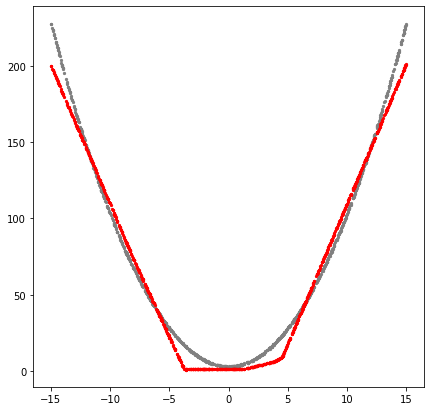

In [30]:
plt.figure(figsize=(7,7))
plt.scatter(x.numpy(),y_noise.numpy(),s=5,c="gray")
plt.scatter(x.detach().numpy(),output.detach().numpy(),s=5,c="red")
plt.show()

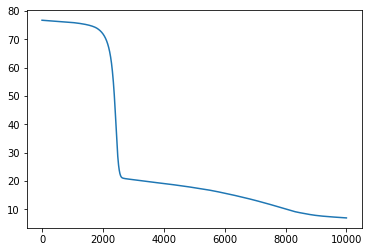

In [31]:
plt.plot(loss_arr)
plt.show()